In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\Aditi.vjain\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

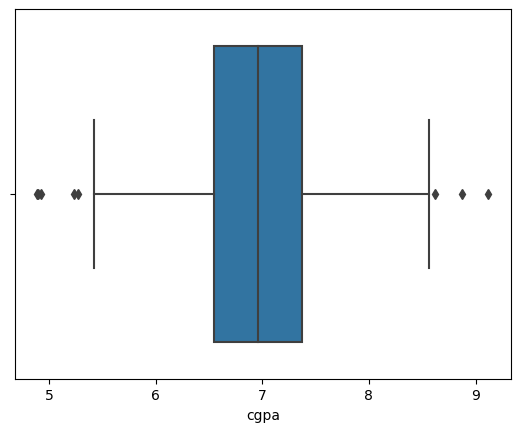

In [5]:
sns.boxplot(df['cgpa'])

# detecting outliers using z-score

In [6]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()
print(upper_limit)
print(lower_limit)

8.808933625397177
5.113546374602842


In [9]:
df[(df['cgpa']<lower_limit) | (df['cgpa']>upper_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [12]:
new_df=df[(df['cgpa']>lower_limit) & (df['cgpa']<upper_limit)]

In [13]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# capping

In [19]:
df['cgpa']=np.where(df['cgpa']<lower_limit,
               lower_limit,
               np.where(df['cgpa']>upper_limit,
                       upper_limit,
                       df['cgpa']))

In [20]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# using iqr

In [ ]:
#percentile25 = df['placement_exam_marks'].quantile(0.25)
#percentile75 = df['placement_exam_marks'].quantile(0.75)
#iqr = percentile75 - percentile25
#upper_limit = percentile75 + 1.5 * iqr
#lower_limit = percentile25 - 1.5 * iqr